<h1>Analysis of Sensor Noise</h1>
<p>This section analyses the noise from the sensors by using the results from the callibration tests to establish
whether it is Gaussian or not. White Gaussian noise is assumed by the Kalman Filter. As a result this analysis will determine whether the Kalman Filter is a suitable technique with the designated sensor</p> 


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scy
import scipy.stats as stats
from pandas import DataFrame, Series
%matplotlib inline

In [30]:
# import data sets
left_sharp_df = pd.read_csv("LeftIRReadings.csv")
right_sharp_df = pd.read_csv("RightIRReadings.csv")
left_sharp_df.describe()
left_sharp_df

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,3,523,512,385,321,238,192,152,149,157,108,100,89,77,72,61,47,35
1,3,549,537,392,298,231,198,168,165,126,108,101,93,81,95,63,63,16
2,3,543,512,385,288,241,195,160,173,130,109,107,88,80,69,55,22,40
3,0,523,537,392,297,239,202,162,152,124,96,96,95,86,74,79,43,36
4,3,536,508,394,297,244,195,182,150,143,109,111,89,85,78,63,41,31
5,5,516,536,401,298,237,209,173,144,126,108,101,91,84,48,48,40,36
6,23,538,514,390,284,243,194,154,159,128,109,105,111,82,78,61,40,49
7,2,518,568,397,294,239,199,160,141,125,110,127,93,82,68,55,42,33
8,4,543,540,387,301,239,196,164,146,127,111,100,91,81,91,63,36,40
9,3,522,538,395,297,255,203,162,145,124,109,82,88,80,72,59,45,37


(array([  6.,  13.,   3.,   4.,   2.,   0.,   9.,  11.,   3.,   2.,   1.,
          2.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   1.,   3.,   1.,   4.,   3.,   0.,   1.,   5.,
          5.,   4.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
        518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
        531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
        544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
        557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
        570, 571]),
 <a list of 66 Patch objects>)

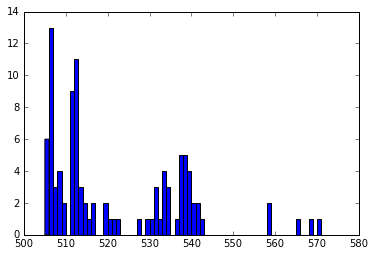

In [41]:
plt.hist(left_sharp_df["20"],bins=np.arange(left_sharp_df["20"].min(), left_sharp_df["20"].max() + 1))

NormaltestResult(statistic=14.079871450609414, pvalue=0.00087618287683585098)

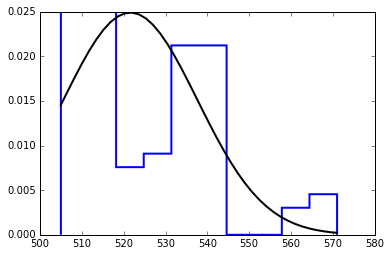

In [72]:
individual_bins = np.arange(left_sharp_df["20"].min(), left_sharp_df["20"].max() + 1 )
#plt.hist(left_sharp_df["100"], bins=50,histtype='step',normed=True)
norm = stats.norm(Series.mean(left_sharp_df["20"]), Series.std(left_sharp_df["20"]))
plt.hist(left_sharp_df["20"], normed=True,histtype='step',lw=2)
xs = np.linspace(left_sharp_df["20"].min(),left_sharp_df["20"].max(),num=40)
plt.plot(xs, norm.pdf(xs), color='k', lw=2)
data = np.array(left_sharp_df["20"])
stats.normaltest(data)

In [62]:
# create figure with probability density function plots for all distances
